# Relax Inc. Data Science Sample Take Home Challenge
This is a practice take home challenge from Relax Inc.

The data is available as two attached CSV files:
takehome_user_engagement. csv
takehome_users . csv
The data has the following two tables:
1. A user table ( "takehome_users" ) with data on 12,000 users who signed up for the product in the last two years. This table includes:
* name: the user's name
* object_id: the user's id
* email: email address
* creation_source: how their account was created. This takes on one of 5 values:
    * PERSONAL_PROJECTS: invited to join another user's personal workspace
    * GUEST_INVITE: invited to an organization as a guest (limited permissions)
    * ORG_INVITE: invited to an organization (as a full member)
    * SIGNUP: signed up via the website
    * SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
* creation_time: when they created their account
* last_session_creation_time: unix timestamp of last login
* opted_in_to_mailing_list: whether they have opted into receiving marketing emails
* enabled_for_marketing_drip: whether they are on the regular marketing email drip
* org_id: the organization (group of users) they belong to
* invited_by_user_id: which user invited them to join (if applicable).
2. A usage summary table ( "takehome_user_engagement" ) that has a row for each day that a user logged into the product.


Defining an "adopted user" as a user who has logged into the product on three separate
days in at least one sevenday period , identify which factors predict future user adoption .


We suggest spending 12
hours on this, but you're welcome to spend more or less.
Please send us a brief writeup of your findings (the more concise, the better no
more
than one page), along with any summary tables, graphs, code, or queries that can help
us understand your approach. Please note any factors you considered or investigation
you did, even if they did not pan out. Feel free to identify any further research or data
you think would be valuable.

## Begin by loading up the data and previewing it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
users=pd.read_csv("takehome_users.csv",encoding='ISO-8859-1')

In [3]:
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0


In [4]:
engage=pd.read_csv("takehome_user_engagement.csv")

In [5]:
engage.head(3)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1


In [6]:
engage=engage.drop("visited",axis=1)

In [7]:
engage.head(3)

,time_stamp,user_id
0,2014-04-22 03:53:30,1
1,2013-11-15 03:45:04,2
2,2013-11-29 03:45:04,2


In [8]:

engage['time_stamp']=pd.to_datetime(engage.time_stamp,errors='coerce')

https://stackoverflow.com/questions/49346045/pandas-user-who-has-logged-into-the-product-on-three-separate-days-in-at-least

In [9]:
engage['time_stamp'] = engage['time_stamp'].dt.floor('d').astype(np.int64)

In [10]:

#sorting and remove duplicated days per users 
df = engage.sort_values(['user_id', 'time_stamp']).drop_duplicates()

a = df.groupby('user_id')['time_stamp'].rolling(window=3)
b = pd.to_timedelta((a.max()- a.min())).dt.days
print(b)





user_id        
1        0          NaN
2        1          NaN
         2          NaN
         3         24.0
         4         26.0
                   ... 
11996    207912     NaN
11997    207913     NaN
11998    207914     NaN
11999    207915     NaN
12000    207916     NaN
Name: time_stamp, Length: 207917, dtype: float64


In [11]:
c = b[b == 7].index.get_level_values('user_id')
c=set(c)

In [12]:

users['adopted']=users.apply(lambda x: 1 if x.object_id in c else 0,axis=1)

In [13]:
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0


In [14]:
users.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int64
dtype: object

In [15]:
users["creation_time"]=pd.to_datetime(users.creation_time)

## Data Visualization

[Text(0, 0, 'January'),
 Text(0, 0, 'February'),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November'),
 Text(0, 0, 'December')]

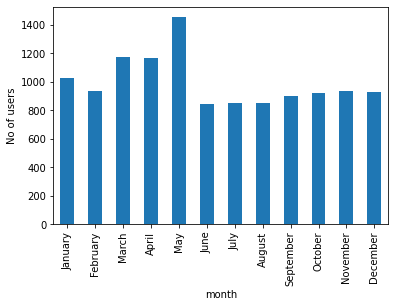

In [16]:
import calendar
x=users.groupby(users["creation_time"].dt.month)["object_id"].count().plot(kind="bar")
plt.xlabel("month")
plt.ylabel("No of users")
x.set_xticklabels([calendar.month_name[d] for d in range(1,13)])

Text(0, 0.5, 'No of users')

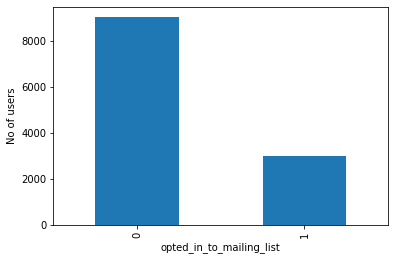

In [17]:

x=users.groupby(users["opted_in_to_mailing_list"])["object_id"].count().plot(kind="bar")
plt.xlabel("opted_in_to_mailing_list")
plt.ylabel("No of users")

Text(0, 0.5, 'No of users')

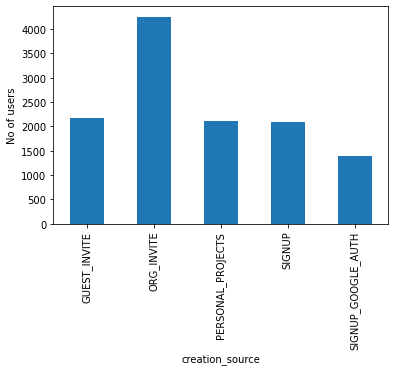

In [18]:

x=users.groupby(users["creation_source"])["object_id"].count().plot(kind="bar")
plt.xlabel("creation_source")
plt.ylabel("No of users")

C:\Users\gunda\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\gunda\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


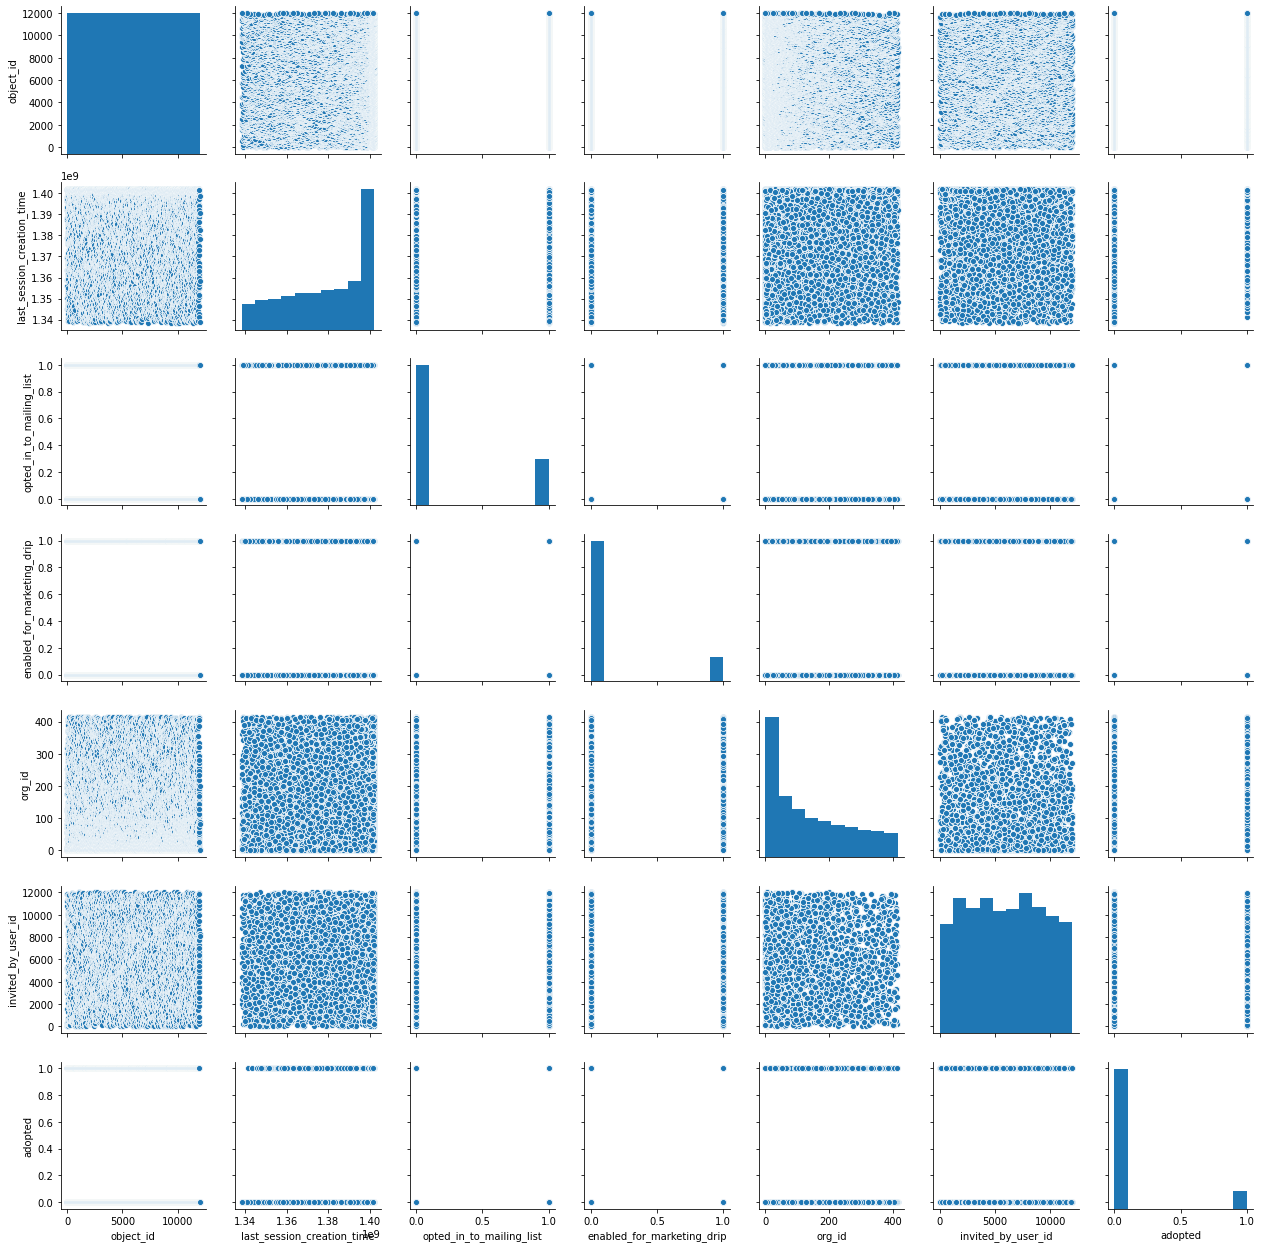

In [19]:
sns.pairplot(users)

In [20]:
users.adopted.value_counts()

0    10642
1     1358
Name: adopted, dtype: int64

## up-sampling adopted users

In [21]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = users[users.adopted==0]
df_minority = users[users.adopted==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=10642,    
                                 random_state=10642) 
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.adopted.value_counts()

1    10642
0    10642
Name: adopted, dtype: int64

In [22]:
users=df_upsampled.copy()

In [23]:
users.head(3)

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0


In [24]:
users.reset_index()


,index,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
2,3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
3,4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0
4,5,6,2013-12-17 03:37:06,Cunha Eduardo,EduardoPereiraCunha@yahoo.com,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
21279,7517,7518,2013-12-01 04:27:29,Danielsen Sander,SanderEDanielsen@gmail.com,SIGNUP_GOOGLE_AUTH,1.401510e+09,1,1,109,NaN,1
21280,369,370,2013-11-16 22:04:53,Hussey Mary,MaryHussey@cuvox.de,ORG_INVITE,1.401487e+09,0,0,414,4476.0,1
21281,5296,5297,2012-06-10 17:32:09,Follett Joseph,JosephFollett@yahoo.com,GUEST_INVITE,1.401903e+09,0,0,69,5577.0,1
21282,10319,10320,2012-08-11 19:35:31,Ingram Ron,RonKIngram@gmail.com,SIGNUP_GOOGLE_AUTH,1.401911e+09,0,0,0,NaN,1


In [25]:
users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted'],
      dtype='object')

In [26]:
users=users[['object_id', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id',
       'adopted']]

In [27]:
users.dtypes

object_id                       int64
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int64
dtype: object

In [28]:
users=users.dropna()

In [29]:
users=pd.get_dummies(users,columns=["creation_source"],drop_first=True)


In [30]:
X=users.drop("adopted",axis=1)
Y=users["adopted"]

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)
regr.fit(X, Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
y_pred=regr.predict(X_test)

In [34]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, y_pred, average='weighted')

In [38]:
f1

0.8384393334053198

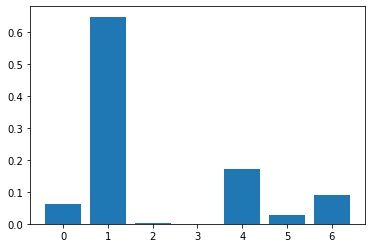

In [36]:
plt.bar([x for x in range(len(regr.feature_importances_))],regr.feature_importances_)
plt.show()

In [37]:
fi = pd.DataFrame(list(zip(X.columns, regr.feature_importances_)), columns = ['features', 'Importance'])
fi.sort_values(by='Importance', ascending=False).head(5)

,features,Importance
1,last_session_creation_time,0.647180
4,org_id,0.169733
6,creation_source_ORG_INVITE,0.088600
0,object_id,0.062913
5,invited_by_user_id,0.027586
